# Import Libraries

In [78]:
import pandas as pd
import numpy as np
from numpy import loadtxt
from numpy import sort
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as mtick
from wordcloud import WordCloud, STOPWORDS 
from random import sample
import seaborn as sns
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.utils import resample
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, precision_recall_curve
import scipy as sp
from scipy import stats


from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


from tensorflow.keras.layers import Dense,Flatten,Input
from tensorflow.keras import Sequential

# Import Data

In [79]:
df_2015 = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/2015_Financial_Data.csv",index_col="Unnamed: 0")
df_2016 = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/2016_Financial_Data.csv",index_col="Unnamed: 0")
df_2017 = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/2017_Financial_Data.csv",index_col="Unnamed: 0")
df_2018 = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/2018_Financial_Data.csv",index_col="Unnamed: 0")

# 2015_Financial_Data

In [80]:
data_info = pd.set_option('display.max_columns', None)
data_info=pd.DataFrame( df_2015.dtypes).T.rename(index={0:'column type'})
data_info=data_info.append(pd.DataFrame( df_2015.isnull().sum()).T.rename(index={0:'null values (nb)'}))
data_info=data_info.append(pd.DataFrame(df_2015.isnull().sum()/ df_2015.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
display(data_info)

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Long-term investments,Tax assets,Total non-current assets,Total assets,Payables,Short-term debt,Total current liabilities,Long-term debt,Total debt,Deferred revenue,Tax Liabilities,Deposit Liabilities,Total non-current liabilities,Total liabilities,Other comprehensive income,Retained earnings (deficit),Total shareholders equity,Investments,Net Debt,Other Assets,Other Liabilities,Depreciation & Amortization,Stock-based compensation,Operating Cash Flow,Capital Expenditure,Acquisitions and disposals,Investment purchases and sales,Investing Cash flow,Issuance (repayment) of debt,Issuance (buybacks) of shares,Dividend payments,Financing Cash Flow,Effect of forex changes on cash,Net cash flow / Change in cash,Free Cash Flow,Net Cash/Marketcap,priceBookValueRatio,priceToBookRatio,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue,ebitperRevenue,ebtperEBIT,niperEBT,grossProfitMargin,operatingProfitMargin,pretaxProfitMargin,netProfitMargin,effectiveTaxRate,returnOnAssets,returnOnEquity,returnOnCapitalEmployed,nIperEBT,eBTperEBIT,eBITperRevenue,payablesTurnover,inventoryTurnover,fixedAssetTurnover,assetTurnover,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,operatingCycle,daysOfPayablesOutstanding,cashConversionCycle,debtRatio,debtEquityRatio,longtermDebtToCapitalization,totalDebtToCapitalization,interestCoverage,cashFlowToDebtRatio,companyEquityMultiplier,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,payoutRatio,operatingCashFlowSalesRatio,freeCashFlowOperatingCashFlowRatio,cashFlowCoverageRatios,shortTermCoverageRatios,capitalExpenditureCoverageRatios,dividendpaidAndCapexCoverageRatios,dividendPayoutRatio,Revenue per Share,Net Income per Share,Operating Cash Flow per Share,Free Cash Flow per Share,Cash per Share,Book Value per Share,Tangible Book Value per Share,Shareholders Equity per Share,Interest Debt per Share,Market Cap,Enterprise Value,PE ratio,Price to Sales Ratio,POCF ratio,PFCF ratio,PB ratio,PTB ratio,EV to Sales,Enterprise Value over EBITDA,EV to Operating cash flow,EV to Free cash flow,Earnings Yield,Free Cash Flow Yield,Debt to Equity,Debt to Assets,Net Debt to EBITDA,Current ratio,Interest Coverage,Income Quality,Dividend Yield,Payout Ratio,SG&A to Revenue,R&D to Revenue,Intangibles to Total Assets,Capex to Operating Cash Flow,Capex to Revenue,Capex to Depreciation,Stock-based compensation to Revenue,Graham Number,ROIC,Return on Tangible Assets,Graham Net-Net,Working Capital,Tangible Asset Value,Net Current Asset Value,Invested Capital,Average Receivables,Average Payables,Average Inventory,Days Sales Outstanding,Days Payables Outstanding,Days of Inventory on Hand,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share),5Y Op

In [81]:
nas_by_feature = df_2015.isnull().sum(axis=0)
features_to_drop = nas_by_feature[nas_by_feature>200].index
df_2015.drop(features_to_drop, axis=1, inplace=True)

In [82]:
df_2015.head()

,Revenue,Cost of Revenue,Gross Profit,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Gross Margin,EBIT Margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Total assets,Payables,Total current liabilities,Long-term debt,Total debt,Total liabilities,Other comprehensive income,Retained earnings (deficit),Total shareholders equity,Other Liabilities,Depreciation & Amortization,Stock-based compensation,Operating Cash Flow,Capital Expenditure,Investment purchases and sales,Investing Cash flow,Issuance (repayment) of debt,Financing Cash Flow,Effect of forex changes on cash,Net cash flow / Change in cash,Free Cash Flow,Days Sales Outstanding,Sector,2016 PRICE VAR [%],Class
PG,7.074900e+10,3.705600e+10,3.369300e+10,2.061600e+10,2.264400e+10,1.104900e+10,6.260000e+08,9.761000e+09,2.725000e+09,7.036000e+09,7.036000e+09,2.5000,2.4400,2.712996e+09,0.4762,0.1468,1.352100e+10,1.038700e+10,7.144000e+09,0.1380,0.0995,6.836000e+09,1.160300e+10,4.568000e+09,4.979000e+09,2.964600e+10,1.965500e+10,6.963200e+10,1.294950e+11,8.138000e+09,2.979000e+10,1.832700e+10,3.034500e+10,6.644500e+10,-1.278000e+10,8.480700e+10,6.305000e+10,9.634000e+09,3.134000e+09,3.370000e+08,1.460800e+10,-3.736000e+09,-2.607000e+09,-2.890000e+09,-3.954000e+09,-1.301900e+10,-4.110000e+08,-1.712000e+09,1.087200e+10,23.5667,Consumer Defensive,10.809451,1
VIPS,6.193685e+09,4.669038e+09,1.524648e+09,5.223879e+08,1.205660e+09,3.189877e+08,1.321245e+07,3.154229e+08,7.051995e+07,2.449029e+08,2.449029e+08,0.4234,0.4076,1.796270e+07,0.2462,0.0531,4.181508e+08,3.286353e+08,2.324314e+08,0.0509,0.0395,5.121528e+08,7.906004e+08,3.470559e+08,7.035505e+08,1.872327e+09,4.544144e+08,1.618567e+08,3.086662e+09,1.055651e+09,1.874281e+09,6.252012e+08,6.398369e+08,2.530004e+09,-1.093530e+07,2.489923e+08,5.452448e+08,8.039949e+08,8.951548e+07,4.667093e+07,2.950371e+08,-6.431725e+08,2.831310e+08,-4.525203e+08,1.463565e+07,-8.305870e+07,1.463411e+07,-2.259077e+08,-3.481354e+08,20.4523,Consumer Defensive,-21.637010,0
KR,1.084650e+11,8.551200e+10,2.295300e+10,1.716100e+10,1.981600e+10,3.137000e+09,4.880000e+08,2.630000e+09,9.020000e+08,1.728000e+09,1.728000e+09,1.7400,1.7200,9.826488e+08,0.2116,0.0287,5.066000e+09,3.118000e+09,1.747000e+09,0.0242,0.0159,2.680000e+08,2.680000e+08,1.266000e+09,5.688000e+09,8.911000e+09,1.791200e+10,3.061000e+09,3.049700e+10,5.052000e+09,1.139200e+10,9.723000e+09,1.159700e+10,2.505500e+10,-8.120000e+08,1.236700e+10,5.412000e+09,4.466000e+09,1.948000e+09,1.550000e+08,4.215000e+09,-2.831000e+09,0.000000e+00,-3.060000e+09,2.260000e+08,-1.288000e+09,0.000000e+00,-1.330000e+08,1.384000e+09,4.2603,Consumer Defensive,-15.036503,0
RAD,2.652838e+10,1.895164e+10,7.576732e+09,6.695642e+09,6.733788e+09,8.429440e+08,3.976120e+08,4.268200e+08,-1.682353e+09,2.109173e+09,2.109173e+09,43.4000,41.6000,4.909133e+07,0.2856,0.0311,1.241060e+09,8.244320e+08,2.109173e+09,0.0161,0.0795,1.158990e+08,1.158990e+08,9.809040e+08,2.882980e+09,4.221758e+09,2.091369e+09,4.976040e+08,8.777425e+09,1.133520e+09,2.485000e+09,5.458740e+09,5.559116e+09,8.720369e+09,-4.585000e+07,-5.406675e+09,5.705600e+07,1.251104e+09,4.166280e+08,-1.817300e+07,6.489590e+08,-4.268280e+08,1.549400e+07,-5.936850e+08,-1.184160e+08,-8.578100e+07,0.000000e+00,-3.050700e+07,2.221310e+08,13.4961,Consumer Defensive,4.303799,1
GIS,1.763030e+10,1.168110e+10,5.949200e+09,3.328000e+09,3.871900e+09,2.077300e+09,3.154000e+08,1.808100e+09,5.868000e+08,1.221300e+09,1.221300e+09,2.0200,1.9700,5.960900e+08,0.3374,0.1204,2.711800e+09,2.123500e+09,1.259400e+09,0.1026,0.0693,3.342000e+08,3.342000e+08,1.386700e+09,1.540900e+09,3.685600e+09,3.783300e+09,1.355190e+10,2.183200e+10,1.684000e+09,4.890100e+09,7.575300e+09,9.191500e+09,1

In [83]:
df_2015a = df_2015[["Earnings Before Tax Margin", "Net Profit Margin", "Days Sales Outstanding",
                    "EPS", "Gross Margin", "EBIT Margin",	"EBITDA"
]]

df_2015a = df_2015a.dropna(axis=0)

In [84]:
ss = StandardScaler()
df_2015_std = ss.fit_transform(df_2015a)
df_2015_std = ss.transform(df_2015a)

# import hierarchical clustering libraries

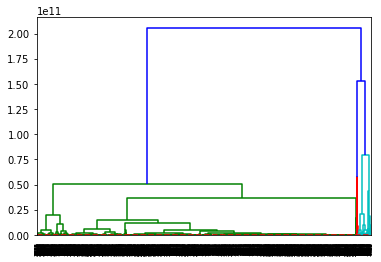

In [85]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch

# create dendrogram
dendrogram_2015 = sch.dendrogram(sch.linkage(df_2015a , method='ward'))
plt.axhline(y=3.5, color='r', linestyle='--')

# import AgglomerativeClustering

In [86]:
from sklearn.cluster import AgglomerativeClustering

# create clusters
hc_2015 = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
y_hc_2015 = hc_2015.fit_predict(df_2015_std)

In [87]:
y_hc_2015

array([1, 4, 4, ..., 4, 4, 4])

In [109]:
#Plot a line graph to see the characteristics of the clusters
df_2015['cluster_2015'] = pd.Series(y_hc_2015, index=df_2015a.index)
data_2015_clustered_std = df_2015.groupby('cluster_2015').mean()
a = data_2015_clustered_std
a/10

,Revenue,Cost of Revenue,Gross Profit,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Gross Margin,EBIT Margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Total assets,Payables,Total current liabilities,Long-term debt,Total debt,Total liabilities,Other comprehensive income,Retained earnings (deficit),Total shareholders equity,Other Liabilities,Depreciation & Amortization,Stock-based compensation,Operating Cash Flow,Capital Expenditure,Investment purchases and sales,Investing Cash flow,Issuance (repayment) of debt,Financing Cash Flow,Effect of forex changes on cash,Net cash flow / Change in cash,Free Cash Flow,Days Sales Outstanding,2016 PRICE VAR [%],Class
cluster_2015,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,2.379000e+02,6.620550e+03,-6.382650e+03,7.201186e+05,1.726648e+06,-1.733031e+06,-4.560000e+04,-1.842516e+06,0.000000e+00,-1.842516e+06,-1.842516e+06,-4.891000e+00,-4.891000e+00,4.402663e+06,-3.665955,-814.945820,-1.872685e+06,-1.888116e+06,-1.842516e+06,-799.745820,-799.745820,1.275345e+06,3.106445e+06,0.000000e+00,0.000000e+00,3.240243e+06,1.477840e+04,3.880282e+05,3.653566e+06,2.164224e+05,4.007793e+05,0.000000e+00,0.000000e+00,4.626293e+05,0.000000e+00,-5.643943e+06,3.190937e+06,1.843570e+05,1.543135e+04,1.102051e+05,-1.588965e+06,-7.236750e+03,-9.779000e+05,-1.074021e+06,0.000000e+00,3.212445e+06,-7.500000e+03,5.494588e+05,-1.596202e+06,0.000000,-4.414576,0.000000
1.0,6.708163e+09,3.708648e+09,2.998848e+09,1.185195e+09,1.984484e+09,1.014364e+09,9.500721e+07,8.985545e+08,2.315915e+08,6.679258e+08,6.613355e+08,4.610554e-01,4.564307e-01,2.847128e+08,0.057873,0.023034,1.446491e+09,9.896274e+08,6.861105e+08,0.020653,0.016176,2.827308e+09,5.193818e+09,1.350198e+09,4.433653e+08,9.774042e+09,3.274813e+09,2.201770e+09,2.970498e+10,1.439148e+09,1.615722e+10,4.056345e+09,6.465819e+09,2.444919e+10,-2.238737e+08,3.970774e+09,5.095713e+09,1.378103e+10,4.529903e+08,3.451558e+07,1.394496e+09,-5.002966e+08,-2.646362e+08,-9.874297e+08,1.290208e+08,-2.560484e+08,-8.585957e+06,1.052307e+08,8.722926e+08,8.242967,1.349971,0.079661
2.0,2.920000e+04,1.250470e+04,1.669530e+04,1.989242e+06,2.803375e+06,-2.786679e+06,9.391820e+04,-2.549875e+06,0.000000e+00,-2.549875e+06,-2.549875e+06,-7.534036e+06,-7.534036e+06,0.000000e+00,0.057180,-8.410810,-2.437007e+06,-2.455956e+06,-2.549875e+06,-8.732450,-8.732450,7.927240e+05,7.927240e+05,5.792800e+03,1.686324e+05,1.050299e+06,3.262960e+04,0.000000e+00,1.158708e+06,1.720500e+04,4.486028e+05,5.497910e+04,1.267182e+05,7.913636e+05,0.000000e+00,-2.775805e+07,3.673449e+05,3.596587e+05,1.894910e+04,6.939777e+05,-2.260604e+06,-3.891500e+03,0.000000e+00,-3.891500e+03,-1.977110e+05,1.895303e+06,0.000000e+00,-3.691927e+05,-2.264496e+06,0.000000,-9.854820,0.000000
3.0,3.257329e+02,2.171553e+02,1.085776e+02,7.850163e+05,3.221933e+06,-3.221824e+06,2.562432e+04,-3.161129e+06,0.000000e+00,-3.161129e+06,-3.161129e+06,-3.724200e-01,-3.724200e-01,1.004092e+06,0.033330,-962.600000,-3.023344e+06,-3.135505e+06,-3.161129e+06,-970.466660,-970.466660,1.087676e+07,1.087676e+07,5.960912e+04,0.000000e+00,1.188046e+07,1.233442e+05,5.297394e+06,1.732085e+07,9.311618e+05,1.247557e+06,2.692725e+04,7.328990e+04,5.217372e+06,0.000000e+00,-1.089175e+07,1.210347e+07,2.700326e+05,1.121607e+05,8.631922e+04,-2.962215e+06,-9.098806e+04,-5.067318e+05,-1.160803e+06,-2.888165e+04,1.200163e+07,0.000000e+00,7.876439e+06,-3.053203e+06,6679.499980,-6.583959,0.000000
4.0,2.564410e+08,1.635013e+08,9.285271e+07,4.698166e+07,7.376345e+07,1.914798e+07,6.184352e+06,1.361982e+07,4.529954e+06,9.087124e+06,8.839632e+06,-5.088662e+02,-5.091470e+02,1.646016e+07,0.049364,-0.488713,3.421998e+07,1.988420e+07,9.644891e+06,-0.5011

In [104]:
data_2015_clustered_std = data_2015_clustered_std[["Earnings Before Tax Margin", "Net Profit Margin", "Gross Margin", "EBIT Margin", "2016 PRICE VAR [%]", "Class"
]]


# Plot a line graph to see the characteristics of the clusters

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  


([0, 1, 2, 3, 4, 5], <a list of 6 Text major ticklabel objects>)

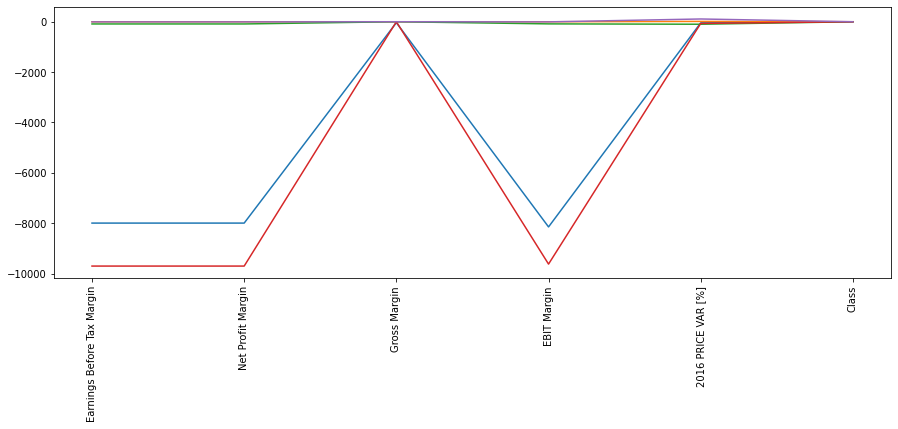

In [105]:
plt.figure(figsize=(15,5))
plt.axis(c=-10000,d=300)
plt.plot(data_2015_clustered_std.T )
plt.xticks(rotation=90)

# Plot a line graph with Z-Scores

In [106]:
data_2015_clustered_stda = stats.zscore(data_2015_clustered_std, axis=1, nan_policy='omit')

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.]),
 <a list of 8 Text major ticklabel objects>)

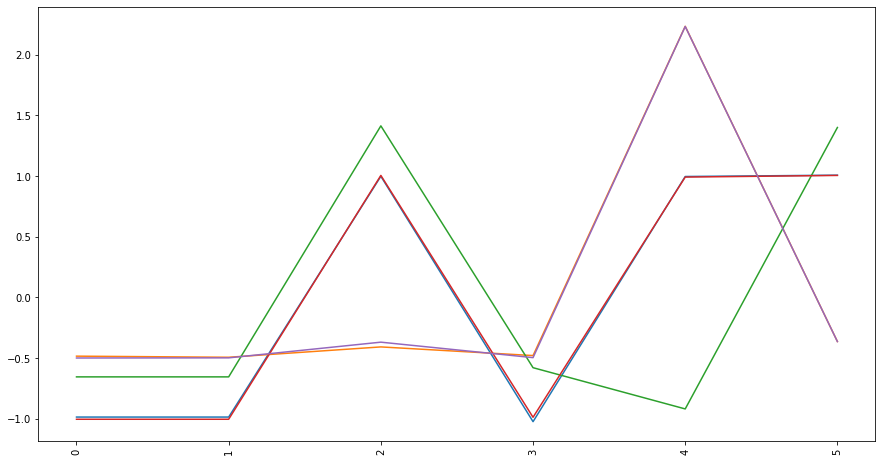

In [107]:
#Plot a line graph to see the characteristics of the clusters
plt.figure(figsize=(15,8))
plt.plot(data_2015_clustered_stda.T )
plt.xticks(rotation=90)

In [112]:
data_2015_clustered_stdd = data_2015_clustered_std[["Gross Profit", "Revenue", "Earnings before Tax", "Net Income", "Total assets", "Total current liabilities", "Operating Cash Flow", "Financing Cash Flow", "Free Cash Flow", "2016 PRICE VAR [%]", "Class"
]]


In [113]:
data_2015_clustered_stda = stats.zscore(data_2015_clustered_stdd, axis=1, nan_policy='omit')

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 <a list of 8 Text major ticklabel objects>)

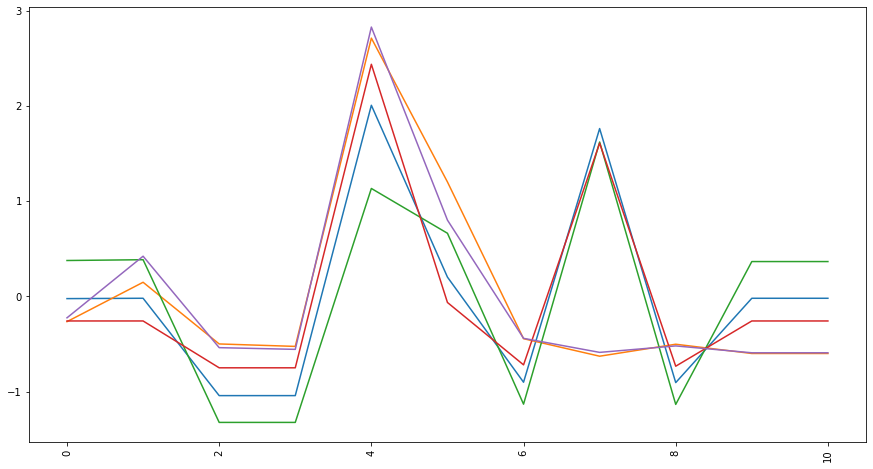

In [114]:
#Plot a line graph to see the characteristics of the clusters
plt.figure(figsize=(15,8))
plt.plot(data_2015_clustered_stda.T )
plt.xticks(rotation=90)

# 2016_Financial_Data

In [115]:
data_info = pd.set_option('display.max_columns', None)
data_info=pd.DataFrame( df_2016.dtypes).T.rename(index={0:'column type'})
data_info=data_info.append(pd.DataFrame( df_2016.isnull().sum()).T.rename(index={0:'null values (nb)'}))
data_info=data_info.append(pd.DataFrame(df_2016.isnull().sum()/ df_2016.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
display(data_info)

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Long-term investments,Tax assets,Total non-current assets,Total assets,Payables,Short-term debt,Total current liabilities,Long-term debt,Total debt,Deferred revenue,Tax Liabilities,Deposit Liabilities,Total non-current liabilities,Total liabilities,Other comprehensive income,Retained earnings (deficit),Total shareholders equity,Investments,Net Debt,Other Assets,Other Liabilities,Depreciation & Amortization,Stock-based compensation,Operating Cash Flow,Capital Expenditure,Acquisitions and disposals,Investment purchases and sales,Investing Cash flow,Issuance (repayment) of debt,Issuance (buybacks) of shares,Dividend payments,Financing Cash Flow,Effect of forex changes on cash,Net cash flow / Change in cash,Free Cash Flow,Net Cash/Marketcap,priceBookValueRatio,priceToBookRatio,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue,ebitperRevenue,ebtperEBIT,niperEBT,grossProfitMargin,operatingProfitMargin,pretaxProfitMargin,netProfitMargin,effectiveTaxRate,returnOnAssets,returnOnEquity,returnOnCapitalEmployed,nIperEBT,eBTperEBIT,eBITperRevenue,payablesTurnover,inventoryTurnover,fixedAssetTurnover,assetTurnover,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,operatingCycle,daysOfPayablesOutstanding,cashConversionCycle,debtRatio,debtEquityRatio,longtermDebtToCapitalization,totalDebtToCapitalization,interestCoverage,cashFlowToDebtRatio,companyEquityMultiplier,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,payoutRatio,operatingCashFlowSalesRatio,freeCashFlowOperatingCashFlowRatio,cashFlowCoverageRatios,shortTermCoverageRatios,capitalExpenditureCoverageRatios,dividendpaidAndCapexCoverageRatios,dividendPayoutRatio,Revenue per Share,Net Income per Share,Operating Cash Flow per Share,Free Cash Flow per Share,Cash per Share,Book Value per Share,Tangible Book Value per Share,Shareholders Equity per Share,Interest Debt per Share,Market Cap,Enterprise Value,PE ratio,Price to Sales Ratio,POCF ratio,PFCF ratio,PB ratio,PTB ratio,EV to Sales,Enterprise Value over EBITDA,EV to Operating cash flow,EV to Free cash flow,Earnings Yield,Free Cash Flow Yield,Debt to Equity,Debt to Assets,Net Debt to EBITDA,Current ratio,Interest Coverage,Income Quality,Dividend Yield,Payout Ratio,SG&A to Revenue,R&D to Revenue,Intangibles to Total Assets,Capex to Operating Cash Flow,Capex to Revenue,Capex to Depreciation,Stock-based compensation to Revenue,Graham Number,ROIC,Return on Tangible Assets,Graham Net-Net,Working Capital,Tangible Asset Value,Net Current Asset Value,Invested Capital,Average Receivables,Average Payables,Average Inventory,Days Sales Outstanding,Days Payables Outstanding,Days of Inventory on Hand,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share),5Y Op

In [116]:
nas_by_feature = df_2016.isnull().sum(axis=0)
features_to_drop = nas_by_feature[nas_by_feature>1000].index
df_2016.drop(features_to_drop, axis=1, inplace=True)

In [117]:
df_2016.head()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Long-term investments,Tax assets,Total assets,Payables,Short-term debt,Total current liabilities,Long-term debt,Total debt,Deferred revenue,Tax Liabilities,Deposit Liabilities,Total liabilities,Other comprehensive income,Retained earnings (deficit),Total shareholders equity,Investments,Other Liabilities,Depreciation & Amortization,Stock-based compensation,Operating Cash Flow,Capital Expenditure,Acquisitions and disposals,Investment purchases and sales,Investing Cash flow,Issuance (repayment) of debt,Issuance (buybacks) of shares,Dividend payments,Financing Cash Flow,Effect of forex changes on cash,Net cash flow / Change in cash,Free Cash Flow,Net Cash/Marketcap,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceSalesRatio,dividendYield,ebitperRevenue,grossProfitMargin,operatingProfitMargin,pretaxProfitMargin,netProfitMargin,returnOnEquity,eBITperRevenue,inventoryTurnover,fixedAssetTurnover,assetTurnover,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,daysOfPayablesOutstanding,debtRatio,debtEquityRatio,longtermDebtToCapitalization,totalDebtToCapitalization,interestCoverage,companyEquityMultiplier,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,payoutRatio,operatingCashFlowSalesRatio,dividendpaidAndCapexCoverageRatios,Revenue per Share,Net Income per Share,Operating Cash Flow per Share,Free Cash Flow per Share,Cash per Share,Book Value per Share,Tangible Book Value per Share,Shareholders Equity per Share,Interest Debt per Share,Market Cap,PE ratio,Price to Sales Ratio,POCF ratio,PFCF ratio,Earnings Yield,Free Cash Flow Yield,Debt to Equity,Debt to Assets,Interest Coverage,Income Quality,Dividend Yield,Payout Ratio,SG&A to Revenue,R&D to Revenue,Intangibles to Total Assets,Capex to Operating Cash Flow,Capex to Revenue,Capex to Depreciation,Stock-based compensation to Revenue,Graham Net-Net,Tangible Asset Value,Net Current Asset Value,Invested Capital,Average Receivables,Average Payables,Average Inventory,Days Sales Outstanding,Days Payables Outstanding,Days of Inventory on Hand,Receivables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2017 PRICE VAR [%],Class
PG,6.529900e+10,-0.0770,3.290900e+10,3.239000e+10,0.000000e+00,1.894900e+10,1.894900e+10,1.344100e+10,5.790000e+08,1.385000e+10,3.342000e+09,9.600000e+07,-577000000.0,1.050800e+10,0.0,1.050800e+10,3.800,3.6900,2.661852e+09,2.661852e+09,2.658,0.4960,0.2680,0.2210,0.1610,0.1856,1.750700e+10,1.442900e+10,1.060400e+10,0.2121,0.1609,7.102000e+09,6.246000e+09,1.334800e+10,4.373000e+09,4.716000e+09,3.378200e+10,1.938500e+10,6.887700e+10,0.000000e+00,1.507000e+09,1.271360e+11,9.325000e+09,1.165300e+10,3.077000e+10,1.894500e+10,3.059800e+10,0.000000e+00,9.113000e+09,0.0,6.915300e+10,-1.590700e+10,8.795300e+10,5.798300e+10,6.246000e+09,9.792000e+09,3.078000e+09,3.350000e+08,1.543500e+10,-3.314000e+09,-1.325000

In [118]:
df_2016a = df_2016.dropna(axis=0)
df_2016a.drop(['Sector','2017 PRICE VAR [%]','Class'],1 , inplace=True) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [119]:
ss = StandardScaler()
df_2016_std = ss.fit_transform(df_2016a)
df_2016_std = ss.transform(df_2016a)

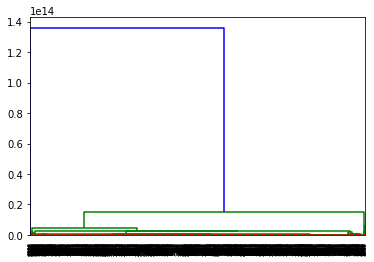

In [120]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch

# create dendrogram
dendrogram_2016 = sch.dendrogram(sch.linkage(df_2016a , method='ward'))
plt.axhline(y=3.5, color='r', linestyle='--')

In [121]:
# import hierarchical clustering libraries
from sklearn.cluster import AgglomerativeClustering

# create clusters
hc_2016 = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
y_hc_2016 = hc_2016.fit_predict(df_2016_std)

In [122]:
y_hc_2016

array([0, 0, 1, ..., 0, 0, 0])

In [128]:
#Plot a line graph to see the characteristics of the clusters
df_2016['cluster_2016'] = pd.Series(y_hc_2016, index=df_2016a.index)
data_2016_clustered_std = df_2016.groupby('cluster_2016').mean()
a = data_2016_clustered_std
a/10

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Long-term investments,Tax assets,Total assets,Payables,Short-term debt,Total current liabilities,Long-term debt,Total debt,Deferred revenue,Tax Liabilities,Deposit Liabilities,Total liabilities,Other comprehensive income,Retained earnings (deficit),Total shareholders equity,Investments,Other Liabilities,Depreciation & Amortization,Stock-based compensation,Operating Cash Flow,Capital Expenditure,Acquisitions and disposals,Investment purchases and sales,Investing Cash flow,Issuance (repayment) of debt,Issuance (buybacks) of shares,Dividend payments,Financing Cash Flow,Effect of forex changes on cash,Net cash flow / Change in cash,Free Cash Flow,Net Cash/Marketcap,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceSalesRatio,dividendYield,ebitperRevenue,grossProfitMargin,operatingProfitMargin,pretaxProfitMargin,netProfitMargin,returnOnEquity,eBITperRevenue,inventoryTurnover,fixedAssetTurnover,assetTurnover,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,daysOfPayablesOutstanding,debtRatio,debtEquityRatio,longtermDebtToCapitalization,totalDebtToCapitalization,interestCoverage,companyEquityMultiplier,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,payoutRatio,operatingCashFlowSalesRatio,dividendpaidAndCapexCoverageRatios,Revenue per Share,Net Income per Share,Operating Cash Flow per Share,Free Cash Flow per Share,Cash per Share,Book Value per Share,Tangible Book Value per Share,Shareholders Equity per Share,Interest Debt per Share,Market Cap,PE ratio,Price to Sales Ratio,POCF ratio,PFCF ratio,Earnings Yield,Free Cash Flow Yield,Debt to Equity,Debt to Assets,Interest Coverage,Income Quality,Dividend Yield,Payout Ratio,SG&A to Revenue,R&D to Revenue,Intangibles to Total Assets,Capex to Operating Cash Flow,Capex to Revenue,Capex to Depreciation,Stock-based compensation to Revenue,Graham Net-Net,Tangible Asset Value,Net Current Asset Value,Invested Capital,Average Receivables,Average Payables,Average Inventory,Days Sales Outstanding,Days Payables Outstanding,Days of Inventory on Hand,Receivables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,2017 PRICE VAR [%],Class
cluster_2016,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,3.181174e+08,0.031952,2.020542e+08,1.160208e+08,7.640505e+06,5.539599e+07,8.504150e+07,3.129628e+07,7.480355e+06,2.485045e+07,6.903716e+06,4.560714e+05,-8.192314e+04,1.790931e+07,2.970427e+05,1.765719e+07,-330.282333,-330.284892,1.403136e+07,1.563461e+07,0.060160,0.051947,-0.288972,-0.290497,-0.306534,-0.228323,5.228751e+07,3.223974e+07,1.840704e+07,-0.296314,-0.295774,5.022873e+07,8.790394e+07,1.380525e+08,4.722835e+07,2.720763e+07,1.792224e+08,1.847473e+08,1.339720e+08,2.420918e+08,8.913930e+06,7.416921e+08,4.331859e+07,1.9

In [124]:
data_2016_clustered_std = data_2016_clustered_std[["Earnings Before Tax Margin", "Net Profit Margin",
                     "Gross Margin", "EBIT Margin",	"2017 PRICE VAR [%]", "Class"
]]


In [125]:
data_2016_clustered_stda = stats.zscore(data_2016_clustered_std, axis=1, nan_policy='omit')

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.]),
 <a list of 8 Text major ticklabel objects>)

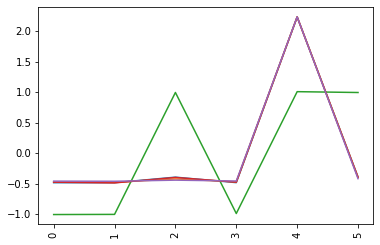

In [126]:
#Plot a line graph to see the characteristics of the clusters
plt.plot(data_2016_clustered_stda.T )
plt.xticks(rotation=90)

Test

In [130]:
data_2016_clustered_stdd = data_2016_clustered_std[["Gross Profit", "Revenue", "Earnings before Tax", "Net Income", "Total assets", "Total current liabilities", "Operating Cash Flow", "Financing Cash Flow", "Free Cash Flow", "2017 PRICE VAR [%]", "Class"
]]


In [131]:
data_2016_clustered_stda = stats.zscore(data_2016_clustered_stdd, axis=1, nan_policy='omit')

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 <a list of 8 Text major ticklabel objects>)

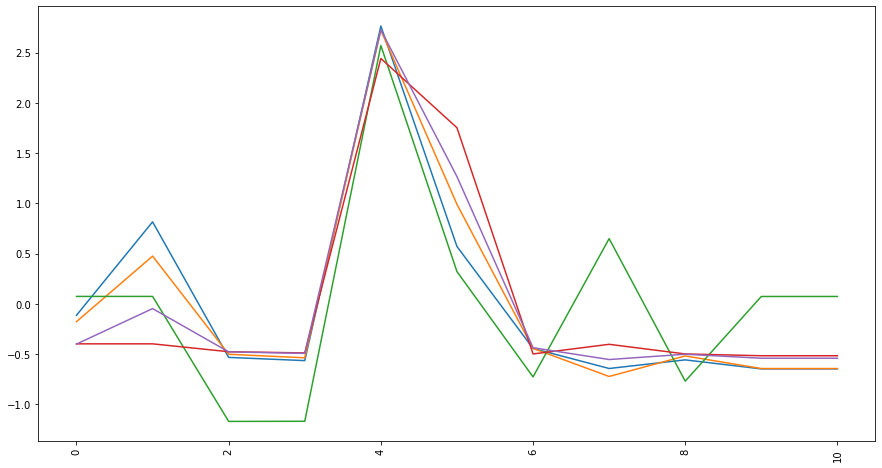

In [132]:
#Plot a line graph to see the characteristics of the clusters
plt.figure(figsize=(15,8))
plt.plot(data_2016_clustered_stda.T )
plt.xticks(rotation=90)

"Gross Profit", "Revenue", "Earnings before Tax", "Net Income", "EPS", "EBIT", "Total assets", "Total current liabilities", "Operating Cash Flow", "Financing Cash Flow", "Free Cash Flow"# ส่วนใหม่